
<img alt='UCL' src="images/ucl_logo.png" align='center'>




# Assessed Practical Part B


## Checklist and proportion of marks

        Part B: 10 Jan, 2022 (50% of final mark) - first day of term 2
    
* There are two parts to this:


    - Snow data preparation [40%]
    - Model inversion [60%]    
    
See the instructions for coursework on [Geog0111_Part2.pdf](Geog0111_Part2.pdf). This provides a full explanation of the model development. 

In these notes, we use some codes to illustrate some model features.

## Introduction

In this task, we will use a simple computer model of catchment-scale hydrology by snowmelt, apply this to a catchment in the Rio Grande Headwaters, Colorado, USA, and use datasets we have generated to **calibrate and test** the model **using multi-year data**.

### The model and data

We use a two-parameter water balance model that describes stream flow at some some measurement station as a function of daily catchment snow cover and daily temperature. You are provided with code for this [model](geog0111/model.py) so you do not need to show this (you will get no marks for repeating that code). It assumes that the water (parameterised as snow water equivalent -- SWE) is stored in the snowpack and released as runoff when the temperature reaches some threshold. An exponential network response function (NRF) is used to model the routing of the snowmelt to water at the measurement station. You can compare the modelled stream flow (for given model parameters and driving data) with measurements to achieve the calibration and validation. 

The two parameters that control model behaviour describe: 

- the threshold temperature `T0`; 
- the delay `f` parameter of the NRF used in routing the water from snowmelt to river flow. 

We will estimate these for the catchment in a model calibration stage using data from 2018, and then validate them against independent data from the year 2019. 

You will need 3 datasets to run the model in this part of the coursework:

- `T` : temperature (C) at the Del Norte monitoring station for each day of the year
- `Q` : stream flow data for each in units of megalitres/day (ML/day i.e. units of 1000000 litres a day)
- `p` : Catchment snow cover (proportion)


The datasets `p` and `T` will form the model driving data. We will use the stream flow observations `Q` to achieve model calibration and validation.

##  Background to the problem

The hydrology of the Rio Grande Headwaters in Colorado, USA is snowmelt dominated. It varies considerably from year to year and may very further under a changing climate. One of the tools we use to understand monitor processes in such an area is a mathemetical ('environmental') model describing the main physical processes affecting hydrology in the catchment. Such a model could help understand current behaviour and allow some prediction about possible future scenarios. 

In this part of your assessment you will be developing datasets for, then using, calibrating and validating such a model that relates temperature and snow cover in the catchment to river flow. 
![](https://www.blm.gov/sites/blm.gov/files/hero_backgrounds/NM_Rio_Grande_del_Norte_Sign_640.jpg)

We will use the model to describe the streamflow at the Del Norte measurement station, just on the edge of the catchment. You will use environmental (temperature) data and snow cover observations to drive the model. You will perform calibration and testing by comparing model output with observed streamflow data.

### Del Norte

Further general information is available from various [websites](http://www.usclimatedata.com/climate.php?location=USCO0103), including [NOAA](http://www.ncdc.noaa.gov).

![www.coloradofishing.net](http://www.coloradofishing.net/images/fishtails/ft_riogrande3.jpg)



You can visualise the site Del Norte 2E  [here](http://mesonet.agron.iastate.edu/sites/site.php?station=CO2184&network=COCLIMATE).


## The model

As we have noted, you will be running, calibrating and testing a snowmelt model in the Rio Grande Headwaters in Colorado, USA. 

The model has two parameters that control model behaviour: 

- the threshold temperature `T0` (C); 
- the delay `f` parameter (days) of the NRF used in routing the water from snowmelt to river flow. 

**We will estimate these for the catchment in a model calibration stage using data from 2018, and then validate them against independent data from the year 2019.**

You will need 3 datasets to run the model in this part of the coursework:

- `T` : temperature (C) at the Del Norte monitoring station for each day of the year
- `Q` : stream flow data for each in units of megalitres/day (ML/day i.e. units of 1000000 litres a day)
- `p` : Catchment snow cover (proportion)

You should already have the datasets `T` and `Q` for the years 2016-2019 inclusive, and will need to make use of the datasets for 2018 and 2019 in this work. In the first part of this submission we will deriving the snow snow cover data from MODIS satellite data. We will explain this below.

First, we should familiarise ourselves with the model. 

The datasets `p` and `T` will form the model driving data. We will use the stream flow observations `Q` to achieve model calibration and validation.



![snow model](images/snowmodel.png)

We use a  logistic function of melt-rate with parameters `T0` and `xp`.


    m = expit((T-T0)/xp)
    
The parameter, `xp` (C) increases the slope of the function at `T==T0` with increasing `xp`. So it can be used to modify the 'speed' of action of the soft switch. We will use a default value of `xp=1.0`. It is likely to have only a minor impact on the modelling results so we can use this assumed value of the parameter. By keeping this parameter at a fixed value, we can simplify the problem you need to solve to one involving two parameters.

We can visualise the impact of changing the parameter T0 on the melt-rate:

Text(0.5, 1.0, 'varying T0')

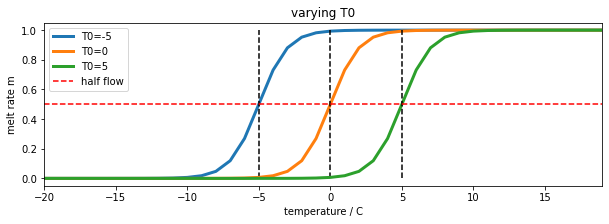

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# temperature
T = np.arange(-20,20)
fig, axs = plt.subplots(1,1,figsize=(10,3))
axs.set_xlabel("temperature / C")
axs.set_ylabel("melt rate m")

for T0 in [-5,0,5]:
    m = expit(T-T0)
    axs.plot(T,m,label=f'T0={T0}',lw=3)
    axs.plot([T0,T0],[0,1],'k--')
    
axs.set_xlim(T[0],T[-1])
axs.plot(T,m*0+0.5,'r--',label='half flow')
axs.legend(loc='best')
axs.set_title('varying T0')

We can visualise the impact of changing the parameter xp on the melt-rate:

Text(0.5, 1.0, 'varying xp')

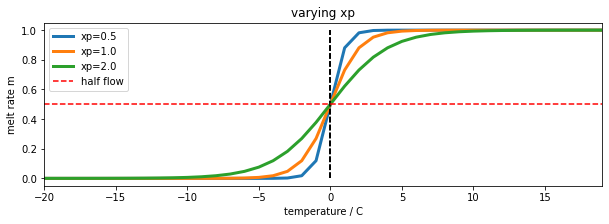

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# temperature
T = np.arange(-20,20)
fig, axs = plt.subplots(1,1,figsize=(10,3))
axs.set_xlabel("temperature / C")
axs.set_ylabel("melt rate m")

T0 = -0.0

for xp in [0.5,1.0,2.0]:
    m = expit((T-T0)/xp)
    axs.plot(T,m,label=f'xp={xp}',lw=3)
    axs.plot([T0,T0],[0,1],'k--')
    
axs.set_xlim(T[0],T[-1])
axs.plot(T,m*0+0.5,'r--',label='half flow')
axs.legend(loc='best')
axs.set_title('varying xp')

This is much less of an impact that changing T0, but there is a correlation between the effects of these two parameters as described in the notes.


The water release from the snow pack on day `t`, `dQ(t)`, is proportional to `p m`, so is controlled by temperature and current snow cover. 

We now load some example datasets of temperature, snow cover and flow. You are *not* to use these in your submission. They are for illustration only.

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
'''
Load example data
'''
pkl_file = open('data/data2005.pkl', 'rb')
# note encoding='latin1' because pickle generated in python2
data = pickle.load(pkl_file, encoding='latin1')
pkl_file.close()

T = data['temp']

# we normalise the flow data by subtracting the base level and 
# making it sum to 1, you should do the same
# or you will need to supply a scaling factor

Q = data['flow'] - data['flow'].min()
Q /= Q.sum()

p = data['snowprop']
t = data['doy']

We plot the datasets, along with `dQ(t)` calculated for a given value of `T0`: 

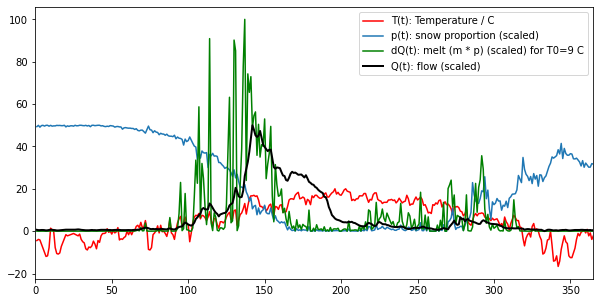

In [4]:
fig, axs = plt.subplots(1,1,figsize=(10,5))
T0 = 9
xp = 1.

m = expit((T-T0)/xp)
# m * p
dQ = m * p
# normalise dQ
dQ /= dQ.sum()

# arbitrary scaling on values 
# to illustrate the datasets
axs.plot(t,T,'r',label='T(t): Temperature / C')
axs.plot(t,50 * p,label='p(t): snow proportion (scaled)')
axs.plot(t,100 * dQ/dQ.max(),'g',label=f'dQ(t): melt (m * p) (scaled) for T0={T0} C')
axs.plot(t,50 * Q/Q.max(),'k',lw=2,label='Q(t): flow (scaled)')

axs.set_xlim(0,365)
axs.legend(loc='best')

In the figure, we see the melt water that corresponds to a `T0` of 9 degrees. It is remarkably similar to the flow data, but much noisier. We also see that it occurs some time before we see the water flow at the monitoring station. The reason for this is that there is a 'network delay' between the melt happening in thge snowpack and it reaching the monitoring station. This final component of our model is a network response function (NRF) that models this delay:

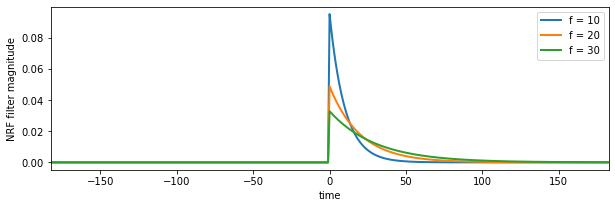

In [7]:
# build the NRF filter
#
# use centred filter time 
# parameter f = 10,20,30 days

nrf_x = (np.arange(p.size) - p.size//2)
# plot
fig, axs = plt.subplots(1,1,figsize=(10,3))

for f in [10,20,30]:
   # filter length

    # filter function
    nrf = np.exp(-nrf_x/f)    
    # 1-sided NRF filter
    nrf[nrf_x<0] = 0
    # normalise so sum to 1
    nrf /= nrf.sum()
    axs.plot(nrf_x,nrf,lw=2,label=f'f = {f:d}')
    
axs.set_xlim(-p.size/2,p.size/2)
axs.set_ylabel('NRF filter magnitude')
axs.set_xlabel('time') 
plt.legend()

The NRF is effectively a one-sided smoothing filter. It imparts a delay on the signal `dQ`, and smooths it. The higher the value of `f`, the more spread out in time the water (the more the delay).

If we look at the **cumulative effect** of the filter using `np.cumsum`, we can see how long it takes for the water to reach the monitoring station:

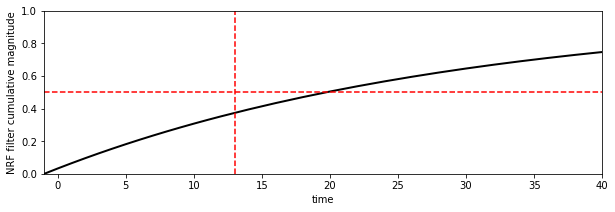

In [8]:
fig, axs = plt.subplots(1,1,figsize=(10,3))
axs.plot(nrf_x,np.cumsum(nrf),'k',lw=2,label='flow (scaled)')
axs.set_xlim(-p.size/2,p.size/2)
axs.set_ylabel('NRF filter cumulative magnitude')
axs.set_xlabel('time')
axs.set_xlim(-1,40)
axs.set_ylim(0,1)
axs.plot([13,13],[0,1],'r--')
axs.plot([-1,40],[0.5,0.5],'r--')

According to this model, with this parameter (f = 20), about half of the melt water has reached the monitoring station after around 13 days. If we increase `f`, we increase the time lag.

If we convolve this filter with out signal `m p`, we have our complete model. It is a very simple model that has only 2 parameters: `T0` and `f`, although we have assumed the flow data to be normalised to sum to 1 to avoid an additional scaling factor.

We can now see the code for the model (also in [geog0111/model.py](geog0111/model.py)):

In [9]:
from scipy.special import expit
import scipy
import scipy.ndimage.filters

def model(T0,f,T,p,xp=1.0):
    '''
    snow melt model by P. Lewis (C) UCL 2010-2022
    
    parameters:
        T0 - Temperature threshold (C): float or shape (Np)
             Typical range: 0.0 to 20.0 C
        f  - NRF filter decay rate (days) : float or shape (Np)
             Trypical range: 5 to 30 days
    Drivers:
        T  - Temperature (C)         : shape (Nd,)
        p  - snow cover (proportion) : shape (Nd,)
        
    Option:
        xp - float (C). Characteristic decay rate in Temperature function 
             typical range 0.25 to 1.0
    
    Output:
    
        Normalised river flow resulting from snowmelt. 
        Normalised to sum to 1.0 over all days
    '''
    # force T0 and f into 1D -> arrays
    f = np.array(f).ravel()[np.newaxis,:]
    T0 = np.array(T0).ravel()[np.newaxis,:]
    # treat T and p into 1D -> 2D arrays
    T = T.ravel()[:,np.newaxis]
    p = p.ravel()[:,np.newaxis]
    
    # logistic for temperature threshold effect
    y = p * expit((T-T0)/xp)
    
    # centred filter time 
    nrf_x = (np.arange(p.shape[0]) - p.shape[0]/2)
    # 1-sided NRF filter scaled by parameter f
    nrf = np.exp(-(nrf_x[:,np.newaxis]/f))
    nrf[nrf_x<0,:] = 0
    
    # modelled flow : loop is inefficent but 
    # necessary if using convolution routine
    Q_nrf = np.array([scipy.ndimage.filters.convolve1d(y[:,i], nrf[:,i]) \
                       for i in range(y.shape[1])]).T
    
    Q_nrf -= Q_nrf.min(axis=0)[np.newaxis,:]
    
    return Q_nrf/Q_nrf.sum(axis=0)

If we run the model and compare with out observations of `Q`:

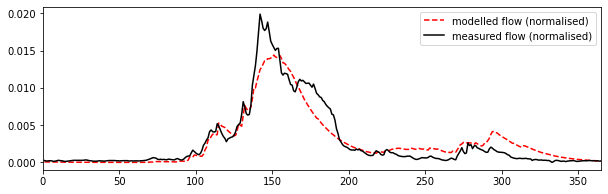

In [10]:
# Run the model
T0,f = 9,20
# T and p are input time series
Q_nrf = model(T0,f,T,p).ravel()

fig, axs = plt.subplots(1,1,figsize=(10,3))
axs.plot(t,Q_nrf,'r--',label=f'modelled flow (normalised)')
axs.plot(t,Q,'k',label='measured flow (normalised)')

axs.set_xlim(0,365)
axs.legend(loc='best')

We can have a look at what the impact of changing the `xp` parameter is, and confirm that it is relatively minor:

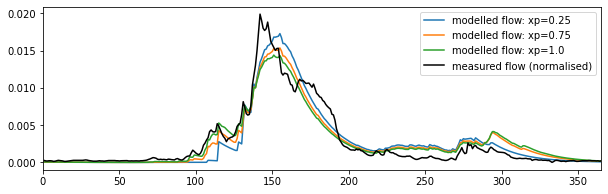

In [11]:
# Run the model
T0,f = 9,20

fig, axs = plt.subplots(1,1,figsize=(10,3))

for xp in [0.25,0.75,1.0]:
    Q_nrf = model(T0,f,T,p,xp=xp).ravel()
    axs.plot(t,Q_nrf,label=f'modelled flow: xp={xp}')

axs.plot(t,Q,'k',label='measured flow (normalised)')

axs.set_xlim(0,365)
axs.legend(loc='best')

So, `xp` has a small impact on peak flows, in effect by smoothing impact the temperature data for increasing `xp`. Other aspects of the model we might look at refining would be the filter shape, but we know that the main impact of the NRF is the width of the filter, rather than the precise shape. Notice that whilst tweaking minor parameters such as these may improve the model fit here slightly, it may well not generalise to other cases as well. Further, when we introduce another 'free' parameter in a model optimisation, we must recognise the impact of the degrees of freedom of the problem.

For the default value of `xp`, and the values of `T0` and `f` considered here then, the model appears to be capable of following the features of the measured flow data quite well, although it its slightly over-smoothed.

We have defined a simple snow melt model. It has two major parameters that we can vary:

* `T0`: the lower temperature threshold (C)
* `f`: the network response function decay factor (days)

The modelled flow is normalised so that the total flow equals the total measured flow. The base flow is subtracted from the data so that the minimum flow is zero.